All answers have been denoted with a heading. Every answer consists of three graphs:

- train accuracy v/s epochs
- test accuracy v/s epochs
- loss v/s epochs

In [1]:
def testtrain_acc(x):
  correct = 0
  total = 0
  with torch.no_grad():
      for data in x:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  return(100*correct/total)


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Answer 2

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0
    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

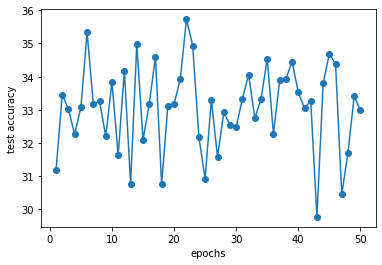

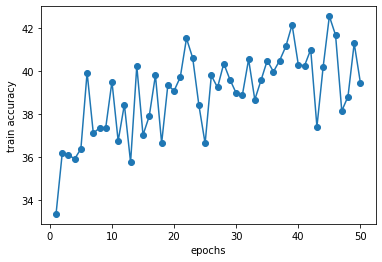

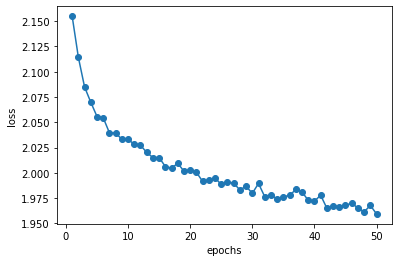

In [ ]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

# Answer 3 (With ReLU)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 110)
        self.fc2 = nn.Linear(110,74)
        self.fc3 = nn.Linear(74,10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0
    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

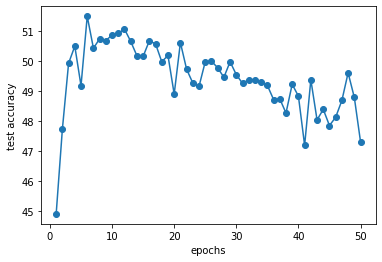

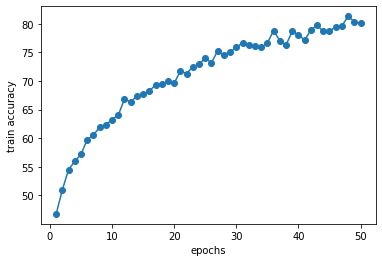

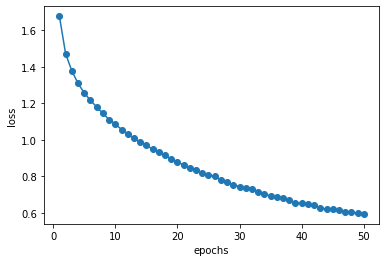

In [ ]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

#Answer 3 (Without ReLU)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 110)
        self.fc2 = nn.Linear(110,74)
        self.fc3 = nn.Linear(74,10)

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0
    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

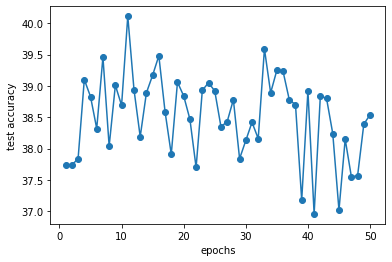

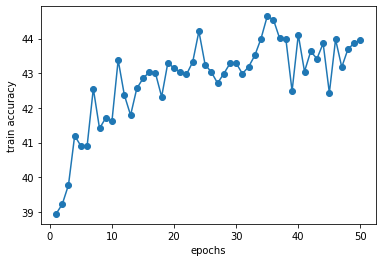

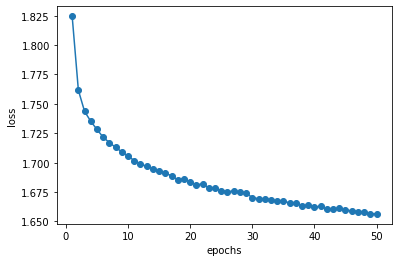

In [17]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

# Answer 4

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 110)
        self.fc2 = nn.Linear(110,74)
        self.fc3 = nn.Linear(74,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            # running_loss = 0.0
    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

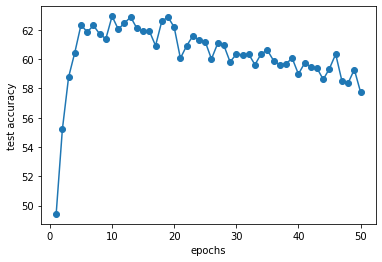

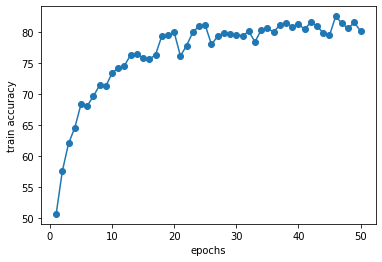

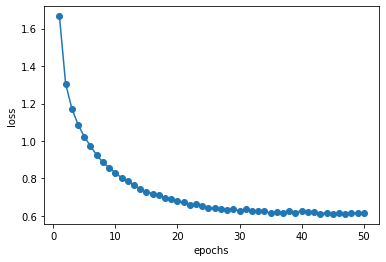

In [13]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

# Answer 5 - Batch 1000

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

batch = 1000

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch)))

In [15]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

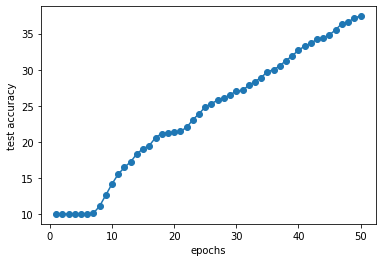

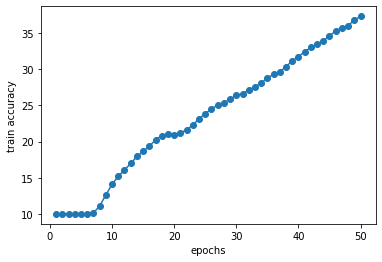

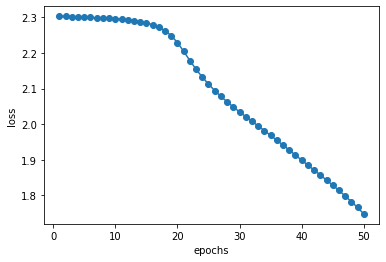

In [16]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

#Answer 5 - Batch 4

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

batch = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

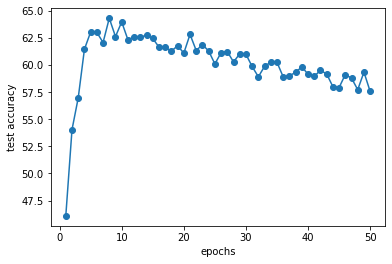

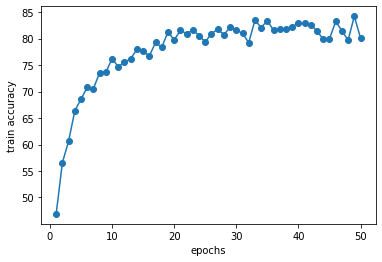

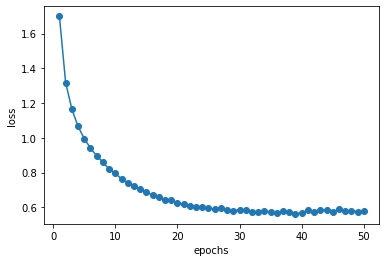

In [8]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

# Answer 5 - Batch 1 (15 epochs)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

batch = 1

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

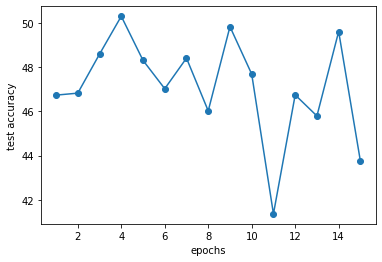

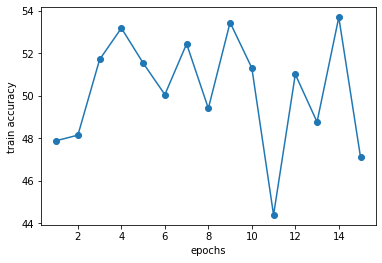

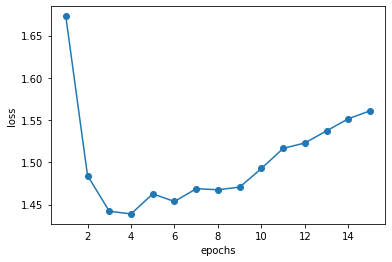

In [7]:
epochs = [i+1 for i in range(15)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

# Answer 6 - Learning rate 10

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

batch = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                         shuffle=False, num_workers=2)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=10, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

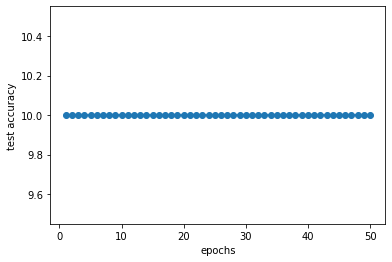

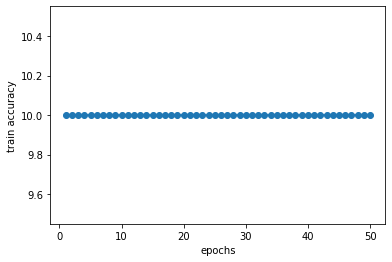

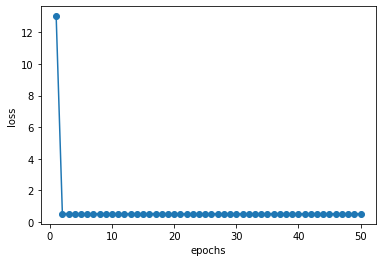

In [10]:
import matplotlib.pyplot as plt

epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

# Answer 6 - Learning Rate 0.1

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

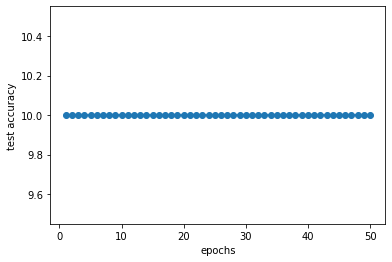

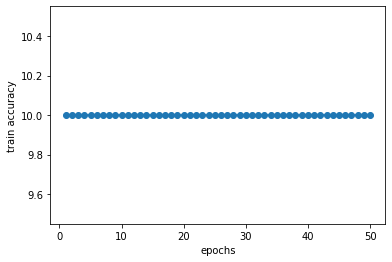

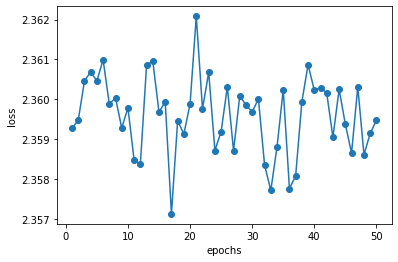

In [24]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

#Answer 6 - Learning rate 0.01



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

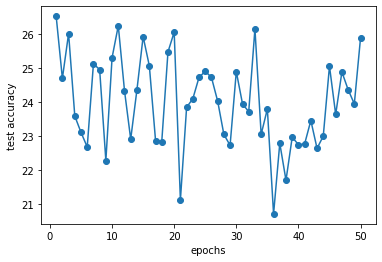

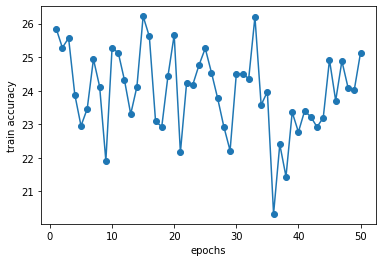

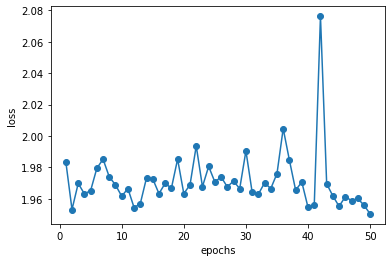

In [5]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

#Answer 6 - Learning rate 0.001

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

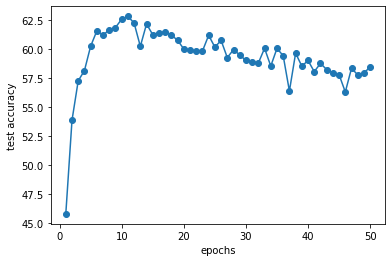

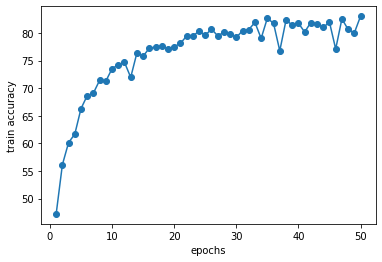

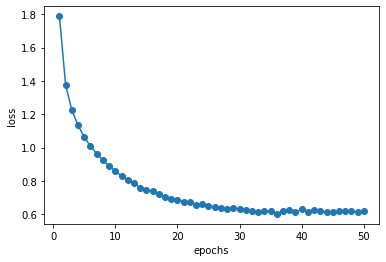

In [31]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

#Answer 7

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose(
    [transforms.RandomResizedCrop(32),
     transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

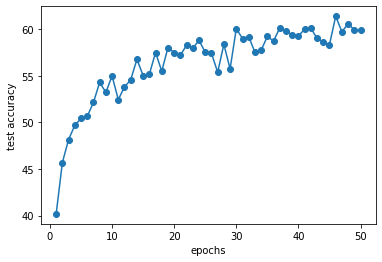

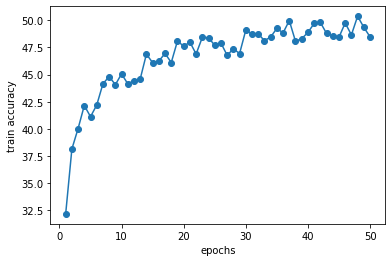

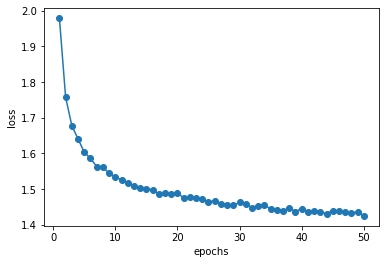

In [36]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

#Answer 8

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

train_acc = []
test_acc = []
loss_vals = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, F.one_hot(labels,num_classes=10).float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0

    train_acc.append(testtrain_acc(trainloader))
    test_acc.append(testtrain_acc(testloader))
    loss_vals.append(running_loss / len(trainloader))

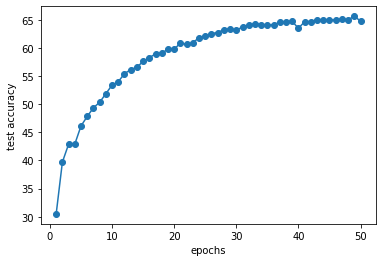

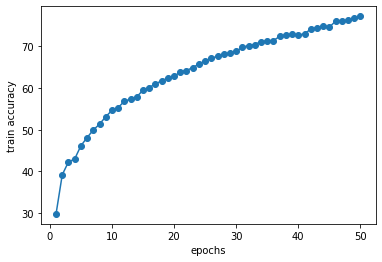

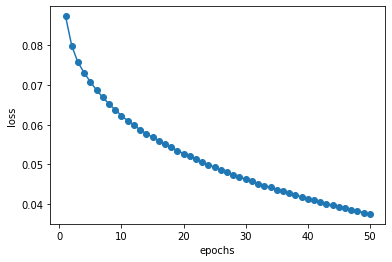

In [39]:
epochs = [i+1 for i in range(50)]
plt.xlabel("epochs")
plt.ylabel("test accuracy")
plt.plot(epochs, test_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.plot(epochs, train_acc, marker="o")
plt.show()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs, loss_vals, marker="o")
plt.show()

# References
- https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
- https://pytorch.org/tutorials/_downloads/cifar10_tutorial.py
- https://pytorch.org/
- https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py
- https://github.com/pytorch/examples/blob/main/mnist/main.py
- https://github.com/pytorch/examples/blob/main/imagenet/main.py